# **`pandas` par l'exemple**

## **Analyse des prénoms parisiens depuis 2004**


### **Importation & lecture de fichier de données**

Commençons par l'importation du module `pandas`



In [1]:
import pandas as pd

Nous allons nous intéresser dans ce *notebook* à l'historique des prénoms déclarés à l'état-civil de
2004 à 2019 sur la ville de Paris. Ces données sont téléchargeables depuis le site
[https://data.gouv.fr](https://data.gouv.fr) et, pour le fichier qui nous intéresse, à cette [adresse](https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86). Une fois le fichier
téléchargé

In [2]:
!wget https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86 -O data/liste_des_prenoms.csv

--2022-11-17 10:13:56--  https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86
Certificat de l’autorité de certification « /etc/ssl/certs/ca-certificates.crt » chargé
Résolution de www.data.gouv.fr (www.data.gouv.fr)… 37.59.183.93
Connexion à www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 FOUND
Emplacement : https://opendata.paris.fr/explore/dataset/liste_des_prenoms/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false [suivant]
--2022-11-17 10:13:56--  https://opendata.paris.fr/explore/dataset/liste_des_prenoms/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false
Résolution de opendata.paris.fr (opendata.paris.fr)… 34.248.20.69, 34.249.199.226
Connexion à opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/csv]
Sauvegarde en : « data/liste_des_prenoms.c

nous pouvons jeter un coup d'oeil aux premières lignes

In [3]:
!head data/liste_des_prenoms.csv

nombre;sexe;annee;prenoms;nombre_total_cumule
8;F;2006;Angie;8
5;M;2006;Ari;5
6;F;2006;Armance;6
16;M;2006;Artus;16
25;F;2006;Astrid;25
12;M;2006;Aurèle;12
10;F;2006;Camélia;10
9;M;2006;Célestin;9
49;F;2006;Célia;49


Le fichier brut présente ainsi 5 colonnes dont l'intitulé se trouve à la première ligne. Nous allons
charger ce fichier dans un objet de type `pandas.DataFrame` afin de pouvoir le manipuler



In [4]:
data = pd.read_csv("./data/liste_des_prenoms.csv", sep=";")

Les commandes `head()/tail()` permettent d'avoir un aperçu des premières/dernières lignes du `DataFrame`



In [5]:
data.tail(n=20)

,nombre,sexe,annee,prenoms,nombre_total_cumule
22974,136,M,2004,Léo,136
22975,9,F,2004,Léopoldine,9
22976,27,F,2004,Lilou,27
22977,26,M,2004,Luca,26
22978,34,F,2004,Marguerite,34
22979,11,M,2004,Marwan,11
22980,6,F,2004,Méline,6
22981,5,F,2004,Meriem,5
22982,12,M,2004,Miguel,12
22983,7,M,2004,Mohamed-Ali,7


Les indices et les colonnes sont



In [6]:
data.index, data.columns

(RangeIndex(start=0, stop=22994, step=1),
 Index(['nombre', 'sexe', 'annee', 'prenoms', 'nombre_total_cumule'], dtype='object'))

tandis que la "forme" et le type de données sont accessibles *via*



In [7]:
data.shape, data.dtypes

((22994, 5),
 nombre                  int64
 sexe                   object
 annee                   int64
 prenoms                object
 nombre_total_cumule     int64
 dtype: object)

On peut aussi utiliser la fonction `info` associée à chaque `Dataframe` afin d'avoir un aperçu du contenu de l'objet

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22994 entries, 0 to 22993
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre               22994 non-null  int64 
 1   sexe                 22994 non-null  object
 2   annee                22994 non-null  int64 
 3   prenoms              22994 non-null  object
 4   nombre_total_cumule  22994 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 898.3+ KB


### **Premier analyse & manipulation des données**

Dans un premier temps, nous allons renommer la colonne "Nombre total cumule par annee" en "cumul"
afin de pouvoir accéder à cette colonne plus facilement



In [9]:
data.rename(columns={"nombre_total_cumule": "cumul"}, inplace=True)
data.columns

Index(['nombre', 'sexe', 'annee', 'prenoms', 'cumul'], dtype='object')

À la lecture des premières lignes, on peut également se poser la question de la différence entre les
données de la colonne "Nombre" et "Cumul". Nous allons dénombrer les lignes pour lesquels ces deux
valeurs sont différentes



In [10]:
mask = data["cumul"] != data["nombre"]
print(mask.sum(), "sur un total de", data.shape[0], "lignes")

232 sur un total de 22994 lignes


puis afficher ces lignes pour tenter de comprendre l'origine de la différence



In [11]:
data[mask]["prenoms"].unique()

array(['Alix', 'Sasha', 'Charlie', 'Sacha', 'Swann', 'Loan', 'Noa',
       'Nour', 'Lou', 'Andrea', 'Andréa', 'Ange', 'Camille', 'Maxime',
       'Adama', 'Eden', 'Louison', 'Éden', 'Jude', 'Noam', 'Noha', 'Elie',
       'Elia', 'Angel', 'Malek', 'Joey', 'Hayden', 'Clarence', 'Maxence',
       'Nikita', 'Noah', 'Aïssa', 'Marley', 'Maé', 'Loïs', 'Yaël', 'Mahé',
       'Kim', 'Morgan'], dtype=object)

Il semble que les différences sont dues aux prénoms mixtes. Affichons les lignes associées au prénom
"Camille"



In [12]:
data[data.prenoms == "Camille"]

,nombre,sexe,annee,prenoms,cumul
1459,82,M,2012,Camille,82
1551,163,F,2012,Camille,245
2856,70,M,2011,Camille,70
4512,95,F,2017,Camille,169
5053,193,F,2010,Camille,253
5154,87,M,2014,Camille,87
5162,166,F,2014,Camille,253
5312,252,F,2006,Camille,287
5496,43,M,2009,Camille,43
5505,230,F,2009,Camille,273


On constate bien que la valeur cumulée correspond à la somme par année des occurences de "Camille"
garçons comme filles. Par la suite, nous allons traiter chaque population de façon distincte, nous
pouvons donc supprimer cette colonne



In [13]:
data.pop("cumul")
data.head()

,nombre,sexe,annee,prenoms
0,8,F,2006,Angie
1,5,M,2006,Ari
2,6,F,2006,Armance
3,16,M,2006,Artus
4,25,F,2006,Astrid


Une fois cette première sélection réalisée, nous pouvons avoir un rapide aperçu des propriétés
statistiques du fichier et de chaque colonne à l'aide de la fonction `describe()`



In [14]:
data.describe()

,nombre,annee
count,22994.000000,22994.000000
mean,24.535618,2012.582717
std,37.171789,5.139269
min,5.000000,2004.000000
25%,7.000000,2008.000000
50%,11.000000,2013.000000
75%,25.000000,2017.000000
max,398.000000,2021.000000


La valeur moyenne du nombre d'occurences d'un prénom est ainsi voisine de ~25 tandis que la valeur
médiane est à 11. La distribution du nombre d'occurences est ainsi totalement asymétrique comme nous
pouvons le voir en représentant la distribution de ces valeurs



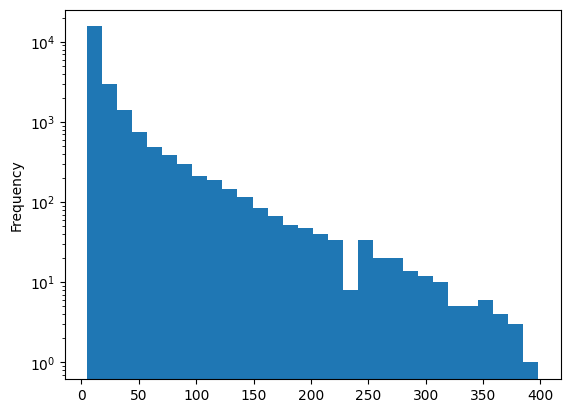

In [15]:
data["nombre"].plot.hist(log=True, bins=30);

### **Aggrégation & tri de valeurs**

Les données fournis par le fichier sont désordonnées aussi bien du point de vue des années que des
prénoms. Nous pouvons trier ces données en les ordonnant temporellement à l'aide de la fonction
`sort_values()`



In [16]:
data.sort_values(by="annee")

,nombre,sexe,annee,prenoms
22993,32,M,2004,Sami
6950,7,M,2004,Camil
6946,5,M,2004,Sebastien
6939,6,M,2004,Calvin
6935,6,F,2004,Satine
...,...,...,...,...
16017,6,F,2021,Gaëlle
16013,6,F,2021,Clotilde
5885,22,F,2021,Georgia
9443,5,M,2021,Constant


L'argument `by` peut tout à la fois prendre le nom d'une colonne ou une liste de noms de colonnes afin de
réaliser un tri successif selon chaque colonne. Ainsi pour trier par année puis, de façon
décroissante, par nombre, nous pouvons écrire



In [17]:
data.sort_values(by=["annee", "nombre"], ascending=False)

,nombre,sexe,annee,prenoms
21669,357,M,2021,Gabriel
6725,250,M,2021,Adam
3648,245,M,2021,Louis
10216,233,M,2021,Raphaël
19448,227,M,2021,Arthur
...,...,...,...,...
22880,5,M,2004,Alfred
22883,5,M,2004,Alvin
22885,5,M,2004,Amin
22902,5,F,2004,Evelyne


On peut également grouper les valeurs selon une colonne. La fonction `groupby()` permet, par exemple,
de regrouper les valeurs par année et d'extraire par la suite le nombre total de naissance par année



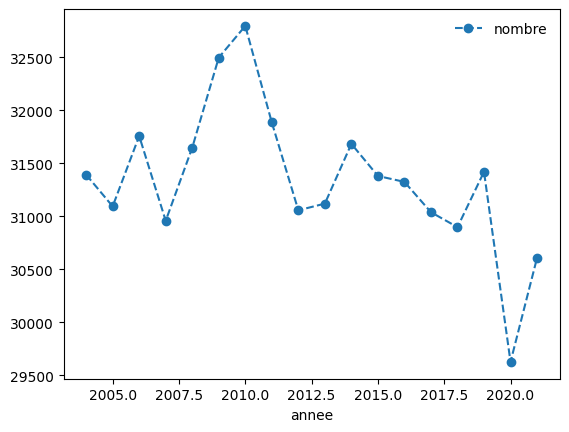

In [18]:
data[["nombre", "annee"]].groupby("annee").sum().plot(style="--o");

On peut également regrouper les naissances en fonction de l'année et du sexe des enfants



In [19]:
data1 = data[["nombre", "annee", "sexe"]].groupby(["annee", "sexe"]).sum()
data1

nombre
annee sexe        
2004  F      14791
      M      16601
2005  F      14890
      M      16203
2006  F      15107
      M      16650
2007  F      14604
      M      16353
2008  F      15161
      M      16486
2009  F      15642
      M      16855
2010  F      15699
      M      17097
2011  F      15267
      M      16618
2012  F      14662
      M      16394
2013  F      14797
      M      16322
2014  F      15076
      M      16607
2015  F      15043
      M      16337
2016  F      14968
      M      16356
2017  F      14724
      M      16314
2018  F      14793
      M      16104
2019  F      14959
      M      16460
2020  F      14221
      M      15404
2021  F      14617
      M      15990

En groupant les données selon deux catégories (Année, Sexe), on obtient un nouvel objet `DataFrame`
dont les indices sont des couples (Année, Sexe)



In [20]:
data1.index

MultiIndex([(2004, 'F'),
            (2004, 'M'),
            (2005, 'F'),
            (2005, 'M'),
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M'),
            (2011, 'F'),
            (2011, 'M'),
            (2012, 'F'),
            (2012, 'M'),
            (2013, 'F'),
            (2013, 'M'),
            (2014, 'F'),
            (2014, 'M'),
            (2015, 'F'),
            (2015, 'M'),
            (2016, 'F'),
            (2016, 'M'),
            (2017, 'F'),
            (2017, 'M'),
            (2018, 'F'),
            (2018, 'M'),
            (2019, 'F'),
            (2019, 'M'),
            (2020, 'F'),
            (2020, 'M'),
            (2021, 'F'),
            (2021, 'M')],
           names=['annee', 'sexe'])

La fonction `unstack()` permet alors de transformer cet objet afin de disposer du nombre de naissances
par sexe en fonction de l'année



In [21]:
data1.unstack()

nombre       
sexe       F      M
annee              
2004   14791  16601
2005   14890  16203
2006   15107  16650
2007   14604  16353
2008   15161  16486
2009   15642  16855
2010   15699  17097
2011   15267  16618
2012   14662  16394
2013   14797  16322
2014   15076  16607
2015   15043  16337
2016   14968  16356
2017   14724  16314
2018   14793  16104
2019   14959  16460
2020   14221  15404
2021   14617  15990

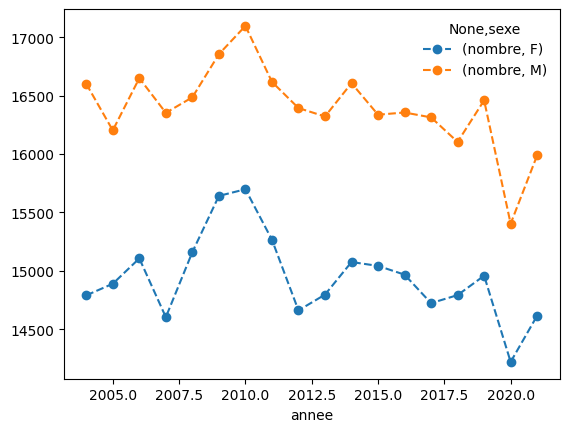

In [22]:
data1.unstack().plot(style="--o");

Finalement, pour trouver les noms les plus utilisés en fonction des années et du sexe de l'enfant,
on peut utiliser la fonction `max()` qui retourne, après avoir groupé les données, les valeurs
maximales **par colonne**



In [23]:
data.groupby(["annee", "sexe"]).max()

nombre   prenoms
annee sexe                  
2004  F        268    Émilie
      M        320  Zinedine
2005  F        283       Éva
      M        329      Éric
2006  F        282       Éva
      M        314   Étienne
2007  F        265       Éva
      M        311      Éric
2008  F        288       Éva
      M        316     Émile
2009  F        322       Éva
      M        350     Éthan
2010  F        335       Éva
      M        398      Éric
2011  F        306       Éva
      M        374     Émile
2012  F        307       Éva
      M        371   Étienne
2013  F        346       Éva
      M        381   Étienne
2014  F        310       Éva
      M        369     Éthan
2015  F        292       Éva
      M        356   Étienne
2016  F        291       Éva
      M        370   Étienne
2017  F        221       Éva
      M        379   Étienne
2018  F        226       Éva
      M        338  Ézéchiel
2019  F        223       Éva
      M        371   Étienne
2020  F        208       Éva
      M        312   Étienne
2021  F        217       Éva
      M        357   Étienne

Les prénoms affichés correspondent aux valeurs "maximales" soit, pour des chaines de caractères, au
tri alphabétique : Zinédine n'est pas le prénom le plus utilisé en 2004. En revanche, le nombre
maximal de fois où un prénom a été donné correspond bien aux valeurs portées par la colonne
"Nombre". Il s'agit donc pour ces valeurs de trouver les prénoms associés. On peut alors chercher
les indices correspondant à ces valeurs maximales *via* la fonction `idxmax()`



In [24]:
idx = data[["nombre", "annee", "sexe"]].groupby(["annee", "sexe"]).idxmax()
idx

nombre
annee sexe        
2004  F      11706
      M        408
2005  F       8302
      M       7078
2006  F      12898
      M       7667
2007  F      17913
      M       4625
2008  F      21980
      M      11818
2009  F       5639
      M      20893
2010  F      10940
      M      20952
2011  F        384
      M      21000
2012  F       9268
      M      12081
2013  F      15792
      M      21254
2014  F       3377
      M       7368
2015  F       1550
      M       2100
2016  F       1817
      M       2769
2017  F      11780
      M       3093
2018  F      14351
      M      12717
2019  F      12453
      M       8157
2020  F      17152
      M      22072
2021  F      15817
      M      21669

puis d'afficher ces lignes



In [25]:
data.iloc[idx["nombre"]]

,nombre,sexe,annee,prenoms
11706,268,F,2004,Inès
408,320,M,2004,Alexandre
8302,283,F,2005,Inès
7078,329,M,2005,Alexandre
12898,282,F,2006,Emma
7667,314,M,2006,Raphaël
17913,265,F,2007,Louise
4625,311,M,2007,Gabriel
21980,288,F,2008,Louise
11818,316,M,2008,Gabriel


### **Pivoter les données**



Il est possible de transposer les données de telle sorte à inverser indices et colonnes. On peut
également utiliser la fonction `pivot_table()` pour déterminer la façon dont va pivoter le
`DataFrame`. Cette fonction prend 3 arguments :

-   `values` indique les valeurs selon lesquelles réaliser le pivot de la table de données,
-   `columns` permet de spécifier les valeurs qui deviendront les colonnes dans la nouvelle table,
-   `index` permet de spécifier ce qui deviendra l'index de la table pivotée.

On peut, par exemple, représenter le nombre de prénoms attribués (`values`) en fonction de l'année
(`columns`) pour chaque prénoms (`index`)



In [26]:
data.pivot_table(values="nombre", index="prenoms", columns="annee")

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
prenoms,,,,,,,,,,,,,,,,,,
Aaliyah,NaN,NaN,NaN,NaN,5.0,8.0,7.0,NaN,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0,10.0,16.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0,98.0,122.0
Abby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,NaN,9.0,10.0
Abd,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,NaN,5.0,5.0,9.0,NaN,NaN,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Éthan,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,5.0,6.0,5.0,5.0,NaN,NaN,NaN
Étienne,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,5.0,NaN,13.0,5.0,5.0,6.0,6.0,9.0,5.0


On note qu'en l'absence de valeurs, `pandas` associe la valeur *Not a Number*, valeur que l'on peut
ignorer à l'aide de la fonction `dropna()` ou que l'on peut modifier de la façon suivante



In [27]:
data.pivot_table(values="nombre", index="prenoms", columns="annee").fillna(0)

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
prenoms,,,,,,,,,,,,,,,,,,
Aaliyah,0.0,0.0,0.0,0.0,5.0,8.0,7.0,0.0,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0,10.0,16.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0,98.0,122.0
Abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0,0.0,9.0,10.0
Abd,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,0.0,5.0,5.0,9.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Éthan,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,6.0,5.0,5.0,0.0,0.0,0.0
Étienne,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,13.0,5.0,5.0,6.0,6.0,9.0,5.0


Nous avons ainsi accès à la tendance annuelle d'un prénom en le sélectionnant



In [28]:
(
    data.pivot_table(values="nombre", index="prenoms", columns="annee")
    .fillna(0)
    .loc[["Patrick", "Pascal"]]
    .astype(int)
)

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
prenoms,,,,,,,,,,,,,,,,,,
Patrick,10,8,15,7,0,7,0,6,6,0,0,6,0,0,0,0,0,0
Pascal,10,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Le résultat graphique est encore plus parlant



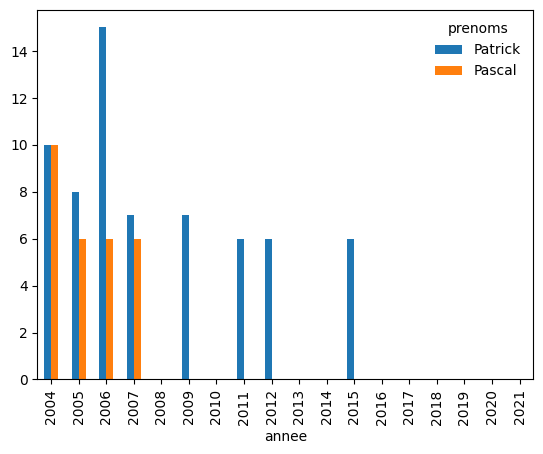

In [29]:
(
    data.pivot_table(values="nombre", index="prenoms", columns="annee")
    .fillna(0)
    .loc[["Patrick", "Pascal"]]
    .T.plot.bar()
);

## **Analyse, tri et manipulation de données temporelles**



`pandas` permet de manipuler des données temporelles en facilitant notamment la lecture des dates,
heures, &#x2026; Nous allons dans cette seconde partie étudier la distribution temporelle correspondant à
la traversée du pont Fremont à Seattle en vélo. Ce notebook est une application directe du chapitre
["*Working with time series*"](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts).

Les données relevées par la ville de Seattle sont consultables à cette [adresse](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k). Nous pouvons
directement les charger dans `DataFrame` à l'aide la fonction `read_csv()` à laquelle nous indiquons
utiliser les dates de relevés comme indices



In [30]:
data = pd.read_csv(
    "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD",
    parse_dates=True,
    index_col="Date",
)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


Les données donne la fréquence horaire de traversée d'Est en Ouest du pont Fremont. Afin de
faciliter la manipulation des données nous allons renommer chaque colonne



In [31]:
data.columns = ["Total", "East", "West"]
data.shape

(87600, 3)

### **Visualisation des données**



Afin d'avoir un rapide aperçu statistique, on peut toujours utiliser la fonction `describe()`



ou visualiser le nombre de traversée en fonction du temps



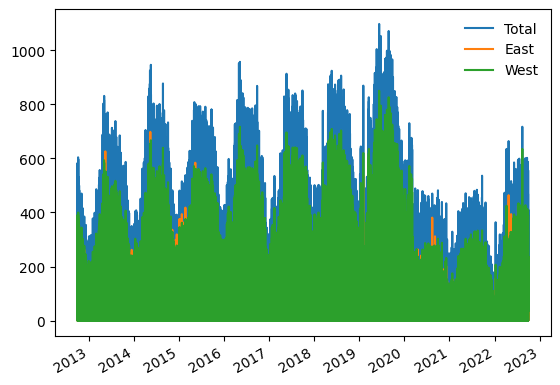

In [32]:
data.plot(xlabel="");

Le taux horaire de données est tel qu'il convient de rééchantillonner les valeurs par semaine



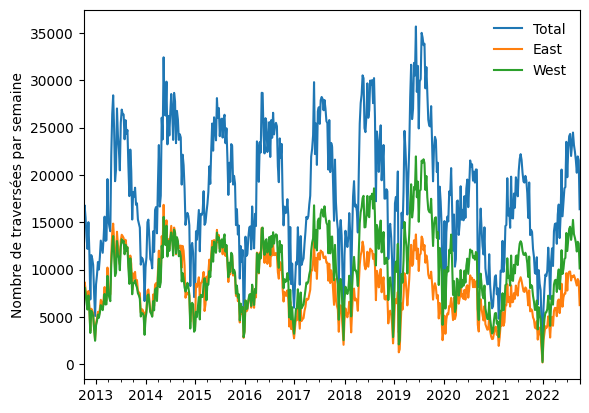

In [33]:
weekly = data.resample("W").sum()
weekly.plot(xlabel="", ylabel="Nombre de traversées par semaine");

Les données laissent clairement apparaître des variations été/hiver de même qu'une augmentation du
trafic depuis l'ouest vers l'est depuis 2017.

Nous pouvons également lisser ces courbes à l'aide d'une moyenne glissante sur la base d'un
échantillonnage journalier. On utilise à cette fin une moyenne glissante sur 30 jours à l'aide de la
fonction `rolling()`



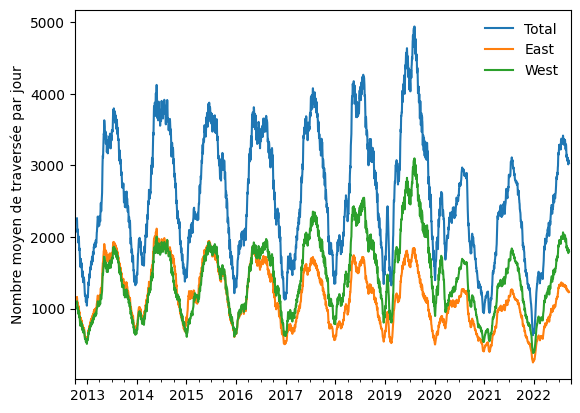

In [34]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).mean().plot(
    xlabel="", ylabel="Nombre moyen de traversée par jour"
);

On peut finalement faire ce même exercice en utilisant une fonction gaussienne afin de minimiser
encore les variations (*Kernel Density Estimation*)



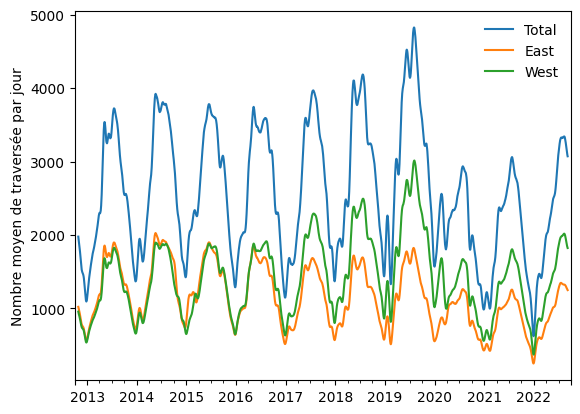

In [35]:
daily.rolling(50, center=True, win_type="gaussian").mean(std=10).plot(
    xlabel="", ylabel="Nombre moyen de traversée par jour"
);

On note une diminution sensible du trafic pendant la période Covid.

### **Variation du trafic par heure**



À l'image des prénoms, il est possible de grouper les données par heure afin d'estimer les
variations moyennes au cours d'une journée



In [36]:
by_time = data.groupby(data.index.time)
by_time.describe()

Total                                                             \
           count        mean         std  min     25%    50%    75%     max   
00:00:00  3650.0   10.471233    8.125413  0.0    5.00    9.0   14.0   124.0   
01:00:00  3650.0    5.516712    5.038832  0.0    2.00    4.0    7.0    86.0   
02:00:00  3640.0    3.609890    3.395843  0.0    1.00    3.0    5.0    61.0   
03:00:00  3650.0    2.675342    3.179661  0.0    1.00    2.0    4.0   144.0   
04:00:00  3650.0    6.250411    4.423186  0.0    3.00    6.0    9.0    73.0   
05:00:00  3650.0   23.601644   15.984224  0.0    9.00   22.0   34.0   154.0   
06:00:00  3650.0   81.357534   60.606925  0.0   24.00   77.0  121.0   333.0   
07:00:00  3650.0  200.918904  161.304687  0.0   48.00  180.0  319.0   841.0   
08:00:00  3650.0  283.143836  215.737934  0.0   79.00  255.0  458.0   892.0   
09:00:00  3649.0  171.452727   98.713829  0.0   89.00  158.0  247.0   547.0   
10:00:00  3649.0   99.034256   45.647554  0.0   66.00   96.0  128.0   668.0   
11:00:00  3649.0   92.840778   54.690323  1.0   55.00   83.0  116.0   717.0   
12:00:00  3649.0  100.530008   61.620618  0.0   57.00   90.0  126.0   637.0   
13:00:00  3650.0  107.256164   64.934960  0.0   62.00   97.0  133.0   545.0   
14:00:00  3650.0  117.447945   68.002254  0.0   68.00  109.0  147.0   664.0   
15:00:00  3650.0  146.271781   68.888956  1.0   93.25  143.0  191.0   516.0   
16:00:00  3650.0  225.976164  116.409010  1.0  140.00  219.0  307.0   588.0   
17:00:00  3650.0  355.792603  239.737609  0.0  152.00  329.0  529.0  1097.0   
18:00:00  3650.0  244.758630  161.566170  0.0  110.00  230.0  355.0   735.0   
19:00:00  3650.0  125.750411   82.877897  0.0   59.00  114.0  178.0   403.0   
20:00:00  3650.0   72.925753   50.076267  0.0   33.00   61.0  102.0   272.0   
21:00:00  3650.0   46.729589   34.640281  0.0   22.00   39.0   65.0   620.0   
22:00:00  3650.0   29.766301   22.483950  0.0   15.00   26.0   41.0   523.0   
23:00:00  3650.0   19.427397   17.530377  0.0   10.00   17.0   25.0   392.0   

            East              ...                   West              \
           count        mean  ...     75%    max   count        mean   
00:00:00  3650.0    4.347123  ...    6.00   43.0  3650.0    6.124110   
01:00:00  3650.0    2.414795  ...    3.00   38.0  3650.0    3.101918   
02:00:00  3640.0    1.702198  ...    2.00   54.0  3640.0    1.907692   
03:00:00  3650.0    1.335068  ...    2.00  138.0  3650.0    1.340274   
04:00:00  3650.0    3.119726  ...    5.00   20.0  3650.0    3.130685   
05:00:00  3650.0   13.752603  ...   21.00  103.0  3650.0    9.849041   
06:00:00  3650.0   46.738904  ...   72.00  262.0  3650.0   34.618630   
07:00:00  3650.0  120.112603  ...  194.75  698.0  3650.0   80.806301   
08:00:00  3650.0  160.903562  ...  270.00  690.0  3650.0  122.240274   
09:00:00  3649.0   89.241984  ...  135.00  302.0  3649.0   82.210743   
10:00:00  3649.0   49.693615  ...   66.00  381.0  3649.0   49.340641   
11:00:00  3649.0   46.600713  ...   59.00  214.0  3649.0   46.240066   
12:00:00  3649.0   49.614689  ...   62.00  425.0  3649.0   50.915319   
13:00:00  3650.0   52.178082  ...   65.00  312.0  3650.0   55.078082   
14:00:00  3650.0   54.986849  ...   69.00  464.0  3650.0   62.461096   
15:00:00  3650.0   64.590411  ...   83.00  394.0  3650.0   81.681370   
16:00:00  3650.0   82.576164  ...  111.00  213.0  3650.0  143.400000   
17:00:00  3650.0  106.493151  ...  151.00  289.0  3650.0  249.299452   
18:00:00  3650.0   84.708219  ...  121.00  271.0  3650.0  160.050411   
19:00:00  3650.0   48.248493  ...   70.00  312.0  3650.0   77.501918   
20:00:00  3650.0   29.875342  ...   43.00  121.0  3650.0   43.050411   
21:00:00  3650.0   20.216712  ...   28.00  541.0  3650.0   26.512877   
22:00:00  3650.0   12.663014  ...   17.00  172.0  3650.0   17.103288   
23:00:00  3650.0    7.849589  ...   11.00  144.0  3650.0   11.577808   

                                                        
                 std  min 

et de représenter graphiquement ces données



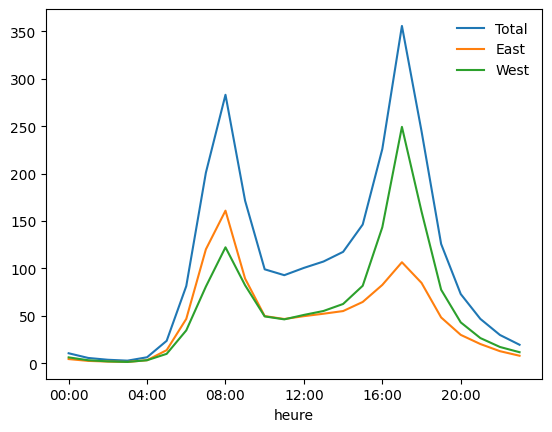

In [37]:
import numpy as np

hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.mean().plot(xticks=hourly_ticks, xlabel="heure");

La distribution est bimodale est fonction des heures de travail (8h le matin, 17h l'après midi) et
les traversées s'inversent bien (la direction est/ouest correspond au trafic agglomération vers
centre-ville)

Nous pouvons également nous intéresser à la fréquence de traversée en fonction du jour et vérifier
que l'utilisation du vélo se fait majoritairement pour se rendre au travail



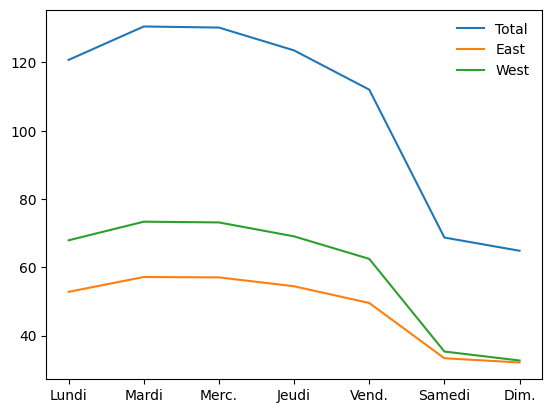

In [38]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Lundi", "Mardi", "Merc.", "Jeudi", "Vend.", "Samedi", "Dim."]
by_weekday.plot();

Finalement, nous pouvons grouper les deux informations heure et jour et comparer les distributions
en fonction du jour de la semaine



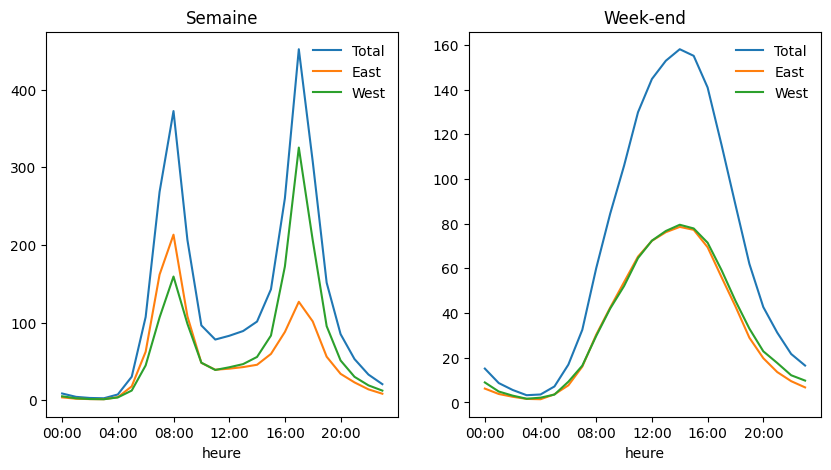

In [39]:
weekend = np.where(data.index.weekday < 5, "Semaine", "Week-end")
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
by_time.loc["Semaine"].plot(
    ax=ax[0], title="Semaine", xticks=hourly_ticks, xlabel="heure"
)
by_time.loc["Week-end"].plot(
    ax=ax[1], title="Week-end", xticks=hourly_ticks, xlabel="heure"
);